## 案例背景
信用卡盗刷一般发生在持卡人信息被不法分子窃取后复制卡片进行消费或信用卡被他人冒领后激活并消费等情况下。一旦发生信用卡盗刷，持卡人和银行都会遭受一定的经济损失。因此，通过大数据技术搭建金融反欺诈模型对银行来说尤为重要。

## 一、模型搭建

### 1、读取数据
读取1000条客户信用卡的交易数据。特征变量有客户换设备次数、在本次交易前的支付失败次数、换IP的次数、换IP国的次数及本次交易的金额。目标变量是本次交易是否存在欺诈，若是盗刷信用卡产生的交易则标记为1，代表欺诈，正常交易则标记为0。其中有400个欺诈样本，600个非欺诈样本。

In [1]:
import pandas as pd
df = pd.read_excel("datasets/信用卡交易数据.xlsx")
df.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


> 本案例为了方便演示，只选取了5个特征变量，在商业实战中使用的特征变量远比本案例多得多。此外，现实中欺诈样本占比较小，可能需要进行过采样或欠采样的处理，本案例的欺诈样本和非欺诈样本数量之比为4∶6，不需要进行过采样或欠采样处理。

### 2、提取特征变量和目标变量

In [2]:
x = df.drop(columns='欺诈标签')
y = df['欺诈标签']

### 3、划分训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) # 设置train_test_split()函数的test_size参数为0.2，即测试集数据占20%；设置random_state参数为123（此数字无特殊含义，可以换成其他数字），使得每次运行代码划分数据的结果保持一致

### 4、模型训练及搭建

In [4]:
from xgboost import XGBRFClassifier # 引入XGBoost分类模型XGBClassifier
clf = XGBRFClassifier(n_estimators=100, learning_rate=0.05) # 将XGBClassifier()赋给变量clf，并设置弱学习器的最大迭代次数，或者说弱学习器的个数n_estimators参数为100，以及弱学习器的权重缩减系数learning_rate为0.05，其余参数都使用默认值
clf.fit(x_train, y_train) # 用fit()函数进行模型训练，其中传入的参数为前面获得的训练集数据X_train、y_train

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n_estimators=100,
                n_jobs=0, num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', ...)

## 二、模型预测及评估

In [5]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

通过如下代码可以汇总预测值和实际值，以便进行对比

In [6]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,0,1
1,1,1
2,1,1
3,0,0
4,0,1


可以看到，前5项的预测准确度为60%。通过如下代码可以查看所有测试集数据的预测准确度

In [7]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.875

计算得到的score为0.875，即对87.5%的测试集数据的预测是正确的。还可用XGBClassifier自带的score()函数来查看准确度，代码如下，获得的结果同样是0.875。

In [8]:
clf.score(x_test, y_test)

0.875

XGBoost分类模型在本质上预测的并不是准确的0或1的分类，而是预测样本属于某一分类的概率，可以用predict_proba()函数查看预测属于各个分类的概率，代码如下。

In [9]:
y_pred_proba = clf.predict_proba(x_test)
y_pred_proba

array([[0.51920855, 0.48079145],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.5198495 , 0.48015052],
       [0.5185606 , 0.4814394 ],
       [0.5204189 , 0.4795811 ],
       [0.47502083, 0.5249792 ],
       [0.5199778 , 0.48002216],
       [0.5143398 , 0.48566023],
       [0.5182148 , 0.48178515],
       [0.4838434 , 0.5161566 ],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.51904   , 0.48096   ],
       [0.5179566 , 0.48204336],
       [0.5172926 , 0.48270735],
       [0.5192013 , 0.4807987 ],
       [0.5199909 , 0.48000908],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.47502083, 0.5249792 ],
       [0.51823497, 0.481765  ],
       [0.5188    , 0.48119998],
       [0.5187483 , 0.48125172],
       [0.51949733, 0.48050267],
       [0.519977  , 0.48002303],
       [0.5201425 , 0.4798575 ],
       [0.47502083, 0.5249792 ],
       [0.

获得的y_pred_proba是一个二维数组，其中第1列为分类为0（即非欺诈）的概率，第2列为分类为1（即欺诈）的概率，可通过如下代码查看欺诈（分类为1）的概率。

In [10]:
y_pred_proba[:, 1]

array([0.48079145, 0.5249792 , 0.5249792 , 0.48015052, 0.4814394 ,
       0.4795811 , 0.5249792 , 0.48002216, 0.48566023, 0.48178515,
       0.5161566 , 0.5249792 , 0.5249792 , 0.5249792 , 0.5249792 ,
       0.48096   , 0.48204336, 0.48270735, 0.4807987 , 0.48000908,
       0.5249792 , 0.5249792 , 0.5249792 , 0.481765  , 0.48119998,
       0.48125172, 0.48050267, 0.48002303, 0.4798575 , 0.5249792 ,
       0.48091984, 0.5249792 , 0.48347402, 0.5249792 , 0.47970834,
       0.4803003 , 0.5249792 , 0.5249792 , 0.5159101 , 0.4805846 ,
       0.48106596, 0.5249792 , 0.48210314, 0.4812205 , 0.47999007,
       0.48048043, 0.5249792 , 0.4803608 , 0.4807914 , 0.48088345,
       0.5249792 , 0.48226944, 0.48164484, 0.48097655, 0.5249792 ,
       0.5249792 , 0.48003566, 0.5249792 , 0.48080528, 0.48053715,
       0.48096672, 0.47987184, 0.5249792 , 0.4813197 , 0.5249792 ,
       0.4809988 , 0.48033062, 0.4802918 , 0.4794778 , 0.516932  ,
       0.5249792 , 0.4806385 , 0.48027226, 0.4800298 , 0.48096

通过绘制ROC曲线来评估模型的预测效果

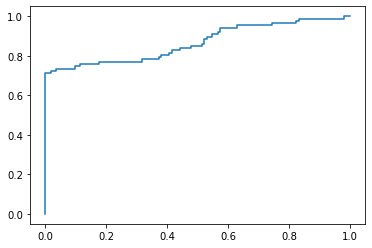

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

计算模型的AUC值

In [13]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:, 1])
score

0.8664428847523141

计算得到的AUC值为0.866，说明预测效果较为理想。通过如下代码可以查看各个特征变量的特征重要性，以便筛选出信用卡欺诈行为判断中最重要的特征变量。

In [14]:
clf.feature_importances_

array([0.4520549 , 0.1714145 , 0.03829743, 0.33140376, 0.00682942],
      dtype=float32)

通过如下代码对特征名称和特征重要性进行汇总，以方便筛选

In [15]:
features = x.columns # 获取特征名称
importances = clf.feature_importances_ # 获取特征重要性
# 整理成二维表格，并按特征重要性降序排列
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
0,换设备次数,0.452055
3,换IP国次数,0.331404
1,支付失败次数,0.171414
2,换IP次数,0.038297
4,交易金额,0.006829


## 三、模型参数调优
XGBoost分类模型的参数有很多，这里选取以下参数进行调优。
* max_depth：弱学习器决策树的最大深度，默认取3。
* n_estimators：弱学习器的个数，或者说弱学习器的最大迭代次数，默认取100。
* earning_rate：学习率，又称为每个弱学习器的权重缩减系数，取值范围为（0，1]，取值较小意味着要达到一定的学习效果，需要更多迭代次数和更多弱学习器，默认取0.1。

通常用n_estimators和learning_rate一起决定算法的拟合效果，所以这两个参数要一起调优。

In [26]:
# 使用GridSearch网格搜索进行参数调优
from sklearn.model_selection import GridSearchCV # 从Scikit-Learn库中引入GridSearchCV()函数
parameters = {'max_depth':[1,3,5], 'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.05, 0.1, 0.2]} # 指定XGBoost分类模型中待调优参数max_depth、n_estimators、learning_rate的候选值范围
clf = XGBRFClassifier() # 构建XGBoost分类模型并将其赋给变量clf
grid_search = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5) # 将模型和待调优参数的候选值范围传入GridSearchCV()函数，设置scoring参数为'roc_auc'，表示以ROC曲线的AUC值作为模型评估标准，并设置cv参数为5，表示交叉验证5次

In [28]:
# 将训练集数据传入网格搜索模型并输出参数的最优值
grid_search.fit(x_train, y_train) # 传入训练集数据
grid_search.best_params_ # 输出参数的最优值

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

从上述结果可以看出，针对本案例的数据，弱学习器决策树的最大深度限制为3，弱学习器的最大迭代次数设置为50，弱学习器的权重缩减系数设置为0.01时，模型的预测效果最佳。

下面使用上面获得的参数最优值重新搭建模型，并传入训练集数据，代码如下

In [29]:
clf = XGBRFClassifier(max_depth=3, n_estimators=50, learning_rate=0.05)
clf.fit(x_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n_estimators=50,
                n_jobs=0, num_parallel_tree=50, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', ...)

参数调优时以ROC曲线的AUC值作为模型评估标准，可以通过如下代码查看新模型的AUC值

In [31]:
y_pred_proba = clf.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:, 1])
score

0.8563218390804598

获得的AUC值为0.856，略低于参数调优前的0.866。**为什么调优后的结果还不如调优前的结果？** 通常来说，出现这种情况的概率较小，可能是因为数据量较小（如本案例只有1000条数据），也可能是因为本案例中使用了交叉验证。简单回顾一下K折交叉验证的思路：将原来的样本数据分为K份（这里设置cv参数为5，即分为5份），然后在这K份数据中选取K-1份作为训练数据，剩下的1份作为测试数据，训练K次，获得K个ROC曲线的AUC值，然后对K个AUC值求均值，再取AUC值的均值最大时的参数为模型的最优参数。需要注意的是，本案例中AUC值的获取是基于训练集数据，只不过是将训练集数据中的1/K作为测试集数据，该测试集数据并不是真正的测试集数据y_test，这也是参数调优后的结果不如调优前的结果的原因。